In [48]:
!pip3 install plot_yar

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# from scipy.optimize import curve_fit
from plot_yar.plot import plot_approx

plt.rc('font', size=16)
plt.rc('legend', fontsize=12)

In [124]:
data1 = pd.read_excel('data_22.xlsx', sheet_name=1)
data2 = pd.read_excel('data_22.xlsx', sheet_name=2)
data3 = pd.read_excel('data_22.xlsx', sheet_name=3)
data1

,1. Мощность излучения от мощности накачки,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"I накачки , A","U накачки, B","P излучения, Bт",P накачки
1,4.500E+00,35,5.500E-02,315
2,5,35,5.500E-02,350
3,6,35,5.500E-02,420
4,10,39,6.300E-02,780
5,11,40,6.600E-02,880
6,12,40,6.600E-02,960
7,13,41,6.700E-02,1066
8,14,43,7.000E-02,1204
9,15,43,7.000E-02,1290


## №1 Мощность излучения от мощности накачки

In [121]:
x1 = data1['Unnamed: 3'][1:]
x1 = x1[x1>500]
y1 = data1['Unnamed: 2'][1:]
y1 = y1[x1.index]
y1 = np.array(y1)[:-1]
x1 = np.array(x1)[:-1]

Coeffs table 0: 

  coeffs  coeffs_values  standard error  relative se, %
0    a_0      1.582E-05       6.738E-13       4.260E-06
1    a_1      5.073E-02       1.133E-06       2.232E-03

Standart_error_Y_0 = 7.468E-04


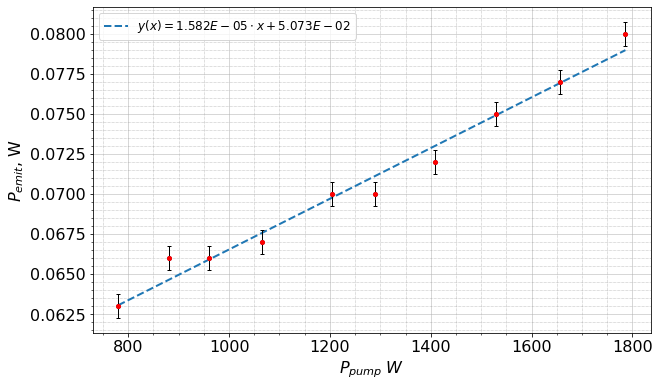

In [122]:
plot_approx(
    [x1], [y1],
    'linear',
    plot_title='',
    x_label=r'$P_{pump}\; W$', y_label=r'$P_{emit}$, W',
    save_fig=True,
    plot_name='P_P'
)

## №2 Мощность 2й гармоники от мощности накачки

Coeffs table 0: 

  coeffs  coeffs_values  standard error  relative se, %
0    a_0     -1.307E+06       9.801E+10       7.499E+06
1    a_1      1.824E+05       1.846E+09       1.012E+06
2    a_2     -6.348E+03       2.171E+06       3.419E+04

Standart_error_Y_0 = 6.186E-01


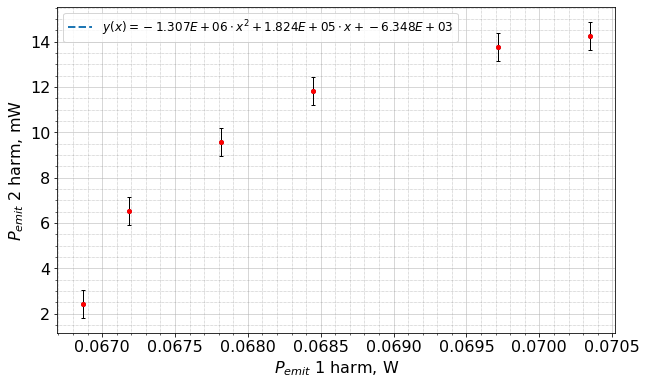

In [176]:
data2

data = pd.read_excel('22.xlsx')

x2 = np.array(data[9:16]['Unnamed: 3'])
y2 = np.array(data[9:16]['Unnamed: 4'])
xy2 = dict(sorted(list(zip(x2,y2)), key=lambda i: i[0]))
x2 = list(xy2.keys())
y2 = list(xy2.values())

x2.pop(4)
lin = lambda x: 1.582e-5 * x + 5.073e-2
xx2 = np.vectorize(lin)(x2)

y2.pop(4)

plot_approx(
    [xx2], [y2],
    'poly_2',
    plot_title='',
    x_label=r'$P_{emit}$ 1 harm, W', y_label=r'$P_{emit}$ 2 harm, mW',
    save_fig=True,
    plot_name='P2_P'
)

/var/folders/bw/2f3knnw55njfknhq6g4hcfkr0000gn/T/ipykernel_35747/613381516.py:1: RuntimeWarning: invalid value encountered in sqrt
  l = lambda x,a,b, c, d: d*(a*x + b)**0.5 + c


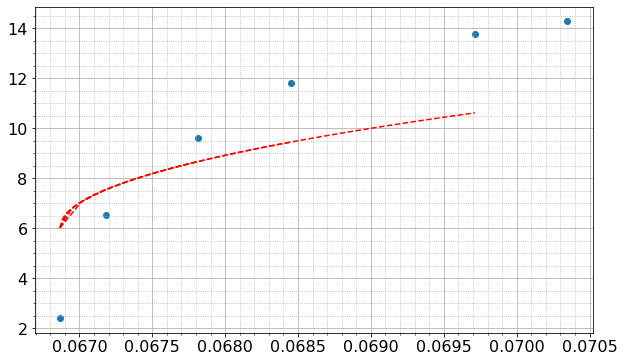

opt [219.70456552 -14.69085335   6.01013718   5.81514909]
cov [4.52304083e+05 3.02439457e+04 5.77038427e+00 5.98581023e+03]


In [182]:


l = lambda x,a,b, c, d: d*(a*x + b)**0.5 + c


opt, cov = curve_fit(l, xx2, y2)

plt.figure(figsize=(10,6))

plt.scatter(xx2, y2)
dots = np.linspace(xx2[0], xx2[:-1], 20)
plt.plot(dots, l(dots, *opt), color='red', linestyle='--')

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.grid()
plt.show()


print(f'opt {opt}')
print(f'cov {np.sqrt(np.diag(cov))}')

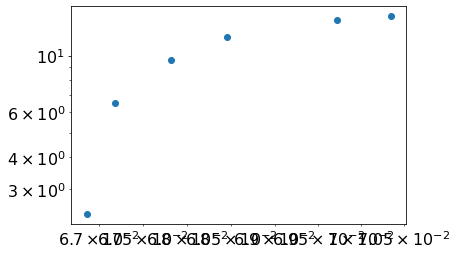

In [170]:
plt.scatter(xx2,y2)
plt.yscale('log')
plt.xscale('log')

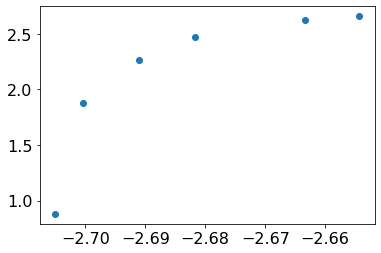

In [168]:
plt.scatter(xxx2, yy2)

## №3 Выходная энергия 2й гармоники от угла поворота

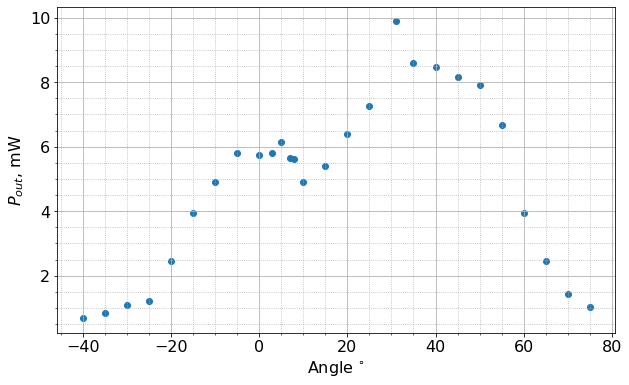

In [70]:
x = np.array(data[16:]['Unnamed: 1'])
y = np.array(data[16:]['Unnamed: 4'])
xy = dict(sorted(list(zip(x,y)), key=lambda i: i[0]))
x = np.array(list(xy.keys()))
y = np.array(list(xy.values()))

plt.figure(figsize=(10,6))

plt.scatter(x, y)

plt.ylabel(r'$P_{out}$, mW')
plt.xlabel(r'Angle $^{\circ}$')

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.grid()

plt.savefig('pictures/P_A.png', dpi=400)
plt.show()